# Cone search for Object tables

In [1]:
import SciServer.CasJobs as cj
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import random 
import numpy as np

In [13]:
LSST="LSST_aris"
# code for perfect(unit?) sphere
SRID=104001

## Find Object rows 
Various different version of table used

In [14]:
#
# use temptable #a iso defining it inside CTE, as otherwise it will be executed multiple times in the union
#
def conesearch(object_table,ra,decl,sr):
    """
    sr in arcmin
    """
    print("[",datetime.now(),"] table:",object_table,", conesearch ({ra},{decl},{sr}:".format(ra=ra,decl=decl,sr=sr))
    sql="""
    declare @cone 
select o.deepsourceid as objId, o.ra, o.decl 
  from htm.CoverCircleEq({ra},{decl},{sr}) c
  join {table} o on o.htmid between c.htmidstart and htmidend
    """.format(table=object_table,ra=ra,decl=decl,sr=sr)
    return cj.executeQuery(sql,LSST)

def conesearch_job(object_table,ra,decl,sr):
    """
    sr in arcmin
    """
    newtable="{table}_{rnd}".format(table=object_table,rnd=random.randint(0,10000000))
    print("[",datetime.now(),"] table:",object_table,", conesearch ({ra},{decl},{sr}):".format(ra=ra,decl=decl,sr=sr),
         "output to:",newtable)
    
    sql="""
select o.deepsourceid as objId, o.ra, o.decl 
into MyDB.{newtable}
  from htm.CoverCircleEq({ra},{decl},{sr}) c
  join {table} o on o.htmid between c.htmidstart and htmidend
    """.format(table=object_table,ra=ra,decl=decl,sr=sr,newtable=newtable)
    return cj.submitJob(sql,LSST),newtable

In [15]:
RA=45;DECL=45;SR=3

m_Object_cci, plan
<img src="./img/cone_cci_plan.png"></img>

In [5]:
%time _cci=conesearch('m_object_cci',RA,DECL,SR)

[ 2020-01-19 17:18:32.938650 ] table: m_object_cci , conesearch (45,45,3:
CPU times: user 44.7 ms, sys: 18.2 ms, total: 63 ms
Wall time: 2.35 s


m_Object_cli, plan
<img src="./img/cone_cli_plan.png"></img>

In [10]:
%time _cli=conesearch('m_object_cli',RA,DECL,SR)

[ 2020-01-19 18:39:13.714944 ] table: m_object_cli , conesearch (45,45,3:
CPU times: user 34.1 ms, sys: 10 ms, total: 44.1 ms
Wall time: 2.14 s


m_Object_page, plan
<img src="./img/cone_page_plan.png"></img>

In [7]:
%time _page=conesearch('m_object_page',RA,DECL,SR)

[ 2020-01-19 17:18:45.554391 ] table: m_object_page , conesearch (45,45,3:
CPU times: user 35.8 ms, sys: 6.82 ms, total: 42.7 ms
Wall time: 2.17 s


ObjectDP_htmid, plan
<img src="./img/cone_dp_plan.png"></img>

In [ ]:
# won't run again.
jobid,newtable=_page=conesearch_job('objectdp_htmid',RA,DECL,SR)
%time r=cj.waitForJob(jobid,verbose=True)

# Adding @region
TBD

In [16]:
def conesearchFull(object_table,ra,decl,sr):
    """
    sr in arcmin
    """
    print("[",datetime.now(),"] table:",object_table,", conesearch ({ra},{decl},{sr}:".format(ra=ra,decl=decl,sr=sr))
    sql="""
    declare @cone dbo.Region = region.Parse('CIRCLE J2000 {ra} {decl} {sr}')

select o.deepsourceid as objId, o.ra, o.decl 
  from htm.Cover(@cone) c 
  join {table} o on o.htmid between c.htmidstart and htmidend
     and @cone.ContainsEq(o.ra,o.decl)=1
    """.format(table=object_table,ra=ra,decl=decl,sr=sr)
    return cj.executeQuery(sql,LSST)

In [17]:
%time _cli_f=conesearchFull('m_object_cli',RA,DECL,SR)

[ 2020-01-20 13:31:04.863963 ] table: m_object_cli , conesearch (45,45,3:
CPU times: user 56.2 ms, sys: 10.1 ms, total: 66.4 ms
Wall time: 2.41 s


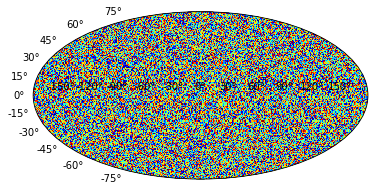

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
arr = np.random.rand(180, 360)

lon = np.linspace(-np.pi, np.pi,360)
lat = np.linspace(-np.pi/2., np.pi/2.,180)
Lon,Lat = np.meshgrid(lon,lat)

im = ax.pcolormesh(Lon,Lat,arr, cmap=plt.cm.jet)

plt.show()